# What is Machine Learning (AI)

**A problem:** 
How do we recognize (label) images? Can we write a program to do the same?

<div>
   <img src="https://github.com/thomasmanke/ABS/raw/main/figures/Sherlock.png",  width="500">
</div>

> “The principal difficulty ... lay in the fact of there being too much evidence. What was vital was overlaid and hidden by what was irrelevant. Of all the facts which were presented to us we had to pick just those which we deemed to be essential, and then piece them together in their order, so as to reconstruct this very remarkable chain of events."  Sherlock Holmes (The Naval treaty, 1893)


- Classical Programming: Rules (f) +  Data (X) --> Answers (Y)   
- Machine Learning: Answers (Y) + Data (X) --> Rules (f)

**Quiz (5 min):**  A simpler challenge: Find the rule $y = f(x, \beta)$ for x and y below

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-1,  0, 1, 2, 3, 4])     # Data
y = np.array([-3, -1, 1, 3, 5, 7])     # Answer

*Notice*: a more realistic scenario would allow for errors: $y = f(x, \beta) + \epsilon$

## The linear regression way (Gauss 1809)

$$f(X, \beta) = \beta_0  + \beta_1 x$$

**Ordinary Least-squares fit**: analytical

$$\underset{\beta}{\mbox{argmin}} || y - f(X,\beta)||^2 \longrightarrow (\beta_0, \beta_1)=(-1,2)$$

**Predictions**: for two new values $(x=10, -40)$


In [2]:
x_new = np.array([10, -40])
y_new = -1 + 2.0*np.array(x_new)
print('predictions: ', x_new, "->", y_new)

predictions:  [ 10 -40] -> [ 19. -81.]


## The Python way (sklearn: 2013)

The modeling steps:
- define the data
- define the model
- fit
- evaluate
- predict



In [3]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lm = linear_model.LinearRegression()  # define model
xr = x.reshape(-1,1)                  # define data (+restructuring for specific tool) 

lm.fit(xr, y)                         # fit c.f. R: lm(Y ~ X)

# report fit
print('Fitted Parameters       ', lm.intercept_, lm.coef_)

yp = lm.predict(xr)                   # prediction
MSE= mean_squared_error(y, yp)        # evaluate fit. other scores: R2=lm.score(xr, y)
print('Mean Squared Error:     ', MSE)

# predict y for some new x
x_new=np.array([10, -40])
y_new = lm.predict(x_new.reshape(-1,1))

print('predictions:   ', y_new)

Fitted Parameters        -1.0 [2.]
Mean Squared Error:      0.0
predictions:    [ 19. -81.]


## The Tensorflow/Keras way (2022)

In [4]:
import tensorflow as tf
print('tf version:',tf.__version__)

# define model - the "black box"
model = tf.keras.Sequential()
model.add( tf.keras.layers.Dense(units=1, input_shape=[1]) )

# define optimization and loss
model.compile(optimizer='sgd', loss='mean_squared_error') 

# fit model ###
fit_history = model.fit(x,y, epochs=100, verbose=0)       

 # report fit ####
print('Fitted Parameters             ', model.trainable_variables)
print('Mean Squared Error (loss):    ', fit_history.history['loss'][-1])

# make predictions ####
x_new = [ 10.0 , -40.0 ]
y_new = model.predict(x_new)
y_ana = -1 + 2.0*np.array(x_new)

print('analytical: ', y_ana)
print('numerical:  ', y_new)

tf version: 2.4.1


2022-06-16 10:22:36.936642: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-16 10:22:36.939112: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-16 10:22:36.941243: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-06-16 10:22:37.327845: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-06-16 10:22:37.343740: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2711995000 Hz


Fitted Parameters              [<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.814552]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([-0.42509162], dtype=float32)>]
Mean Squared Error (loss):     0.19230961799621582
analytical:  [ 19. -81.]
numerical:   [[ 17.720428]
 [-73.00717 ]]


## Don't Panic !

**Notice**:
- tensorflow supports generic **modeling steps**: define model, define loss function, fit model, predict.
- the most cryptic (and the most flexible!) part is the definition of the "black box". We will spend much more time with this - so don't panic.
- There are many **alternative frameworks**: pyTorch, Caffe2, ...
In this course we use the high-level API *Keras* rather than Tensorflow directly.
- tensorflow has **new data structures** that need to get used to: e.g. fitted_parameters
- tensorflow model predictions appear less accurate (and slower) for this task of linear regression. This is because they have been obtained from an **iterative approach** (epcohs). In contrast, sklearn:LinearRegression() uses fast analytical tools (specific for linear regression) under the hood.
- Tthe tensorflow approach is more generic and extends to much more complex models
- The iteration can be monitored by the loss function (MSE) to assess convergence


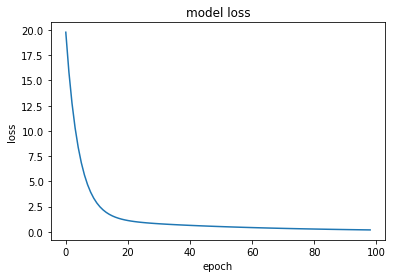

In [5]:
plt.figure()
plt.plot(fit_history.history['loss'][1:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

**Task (10 min):** Play with the new toy !

- The model is fitted iteratively (iterations = epochs) to reduce some loss function (here: *mean_squared error* MSE).

- Change the number of epochs and/or the new data points $x\_new$. Observe the different results.

- You may also activate the verbose function to see some progress reporting

# Linear Regression as a Neural Network

[ image here ]

# Group Task (30 min): Fit Iris Data with tensorflow

Follow the above example to fit a more realistic data set to a linear model.

- Explore the Iris data set: iris.data. What are the variables? See also here: [wikipedia link](https://en.wikipedia.org/wiki/Iris_flower_data_set)
- **Fitting:** Implement a linear fit making use of the tensorflow approach as shown above
- **Convergence:** Plot the loss (MSE) check if it has been reduced over the fitting epochs: $\to$ plot fit_history.history['loss'] 
- **Parameters:** Check the slope (weight) and intersect (bias): $\to$ model.layers[0].get_weights()
- **Predictions:** use the model to obtain the predicted values yp $\to$ model.predict()
- plot the fitted regression line over the scatter plot

- if time allows: feel free to repeat the above analysis for other variables from the Iris data set

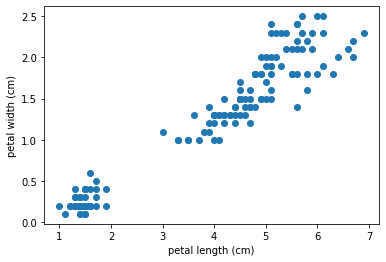

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris() 
ix, iy = 2,3                # you might want to chose different columns
x = iris.data[:,ix]  
y = iris.data[:,iy]  

plt.scatter(x, y)
plt.xlabel(iris.feature_names[ix])
plt.ylabel(iris.feature_names[iy])
plt.show()

Implement a linear fit with tensorflow below.


In [7]:
# it's good practise to test your shapes frequently
print('x.shape: ', x.shape)
print('y.shape: ', y.shape)

# It's good practise to name your models and layers
model = tf.keras.Sequential(name='LM_model_01')
model.add( tf.keras.layers.Dense(units=1, input_shape=(1,), name='1st_layer') )

model.compile(optimizer='sgd', loss='mean_squared_error') 

fh = model.fit(x,y, epochs=100, verbose=0)       

x.shape:  (150,)
y.shape:  (150,)


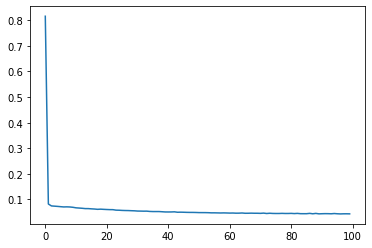

Mean Squared Error (loss):     0.043759576976299286
slope (weight):      0.39647356
intersect (bias):    -0.28474224


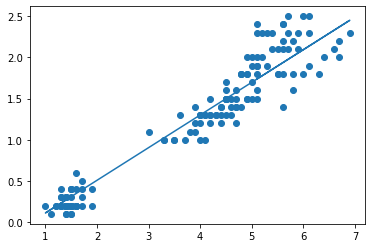

In [8]:
plt.plot(fh.history['loss'])
plt.show()

print('Mean Squared Error (loss):    ', fh.history['loss'][-1])

#print('Fitted Parameters   ', model.trainable_variables)
slope = model.layers[0].get_weights()[0][0][0]
inter = model.layers[0].get_weights()[1][0]
print('slope (weight):     ', slope)
print('intersect (bias):   ', inter)

yp = model.predict(x)
# yp = inter + slope * x  # alternatively

plt.scatter(x, y)
plt.plot(x,yp)
plt.show()

**Warnings:**

- Models are ignorant:  What is the Petal.Width for Petal.Length = -1cm ?
- Assessments of predicted performance should invoke some left out data (test set)
- Models are not necessarily causal

# Shapes & Weights & Numpy 

Tensorflow stores many objects as "tf.Variable". They can be converted to numpy arrays: *.numpy()

For the weights and biases there are convenience functions that return numpy arrays: layer.get_weights()

To interprete the structure and shape of these weights remember:

In general a neural network has
- multiple layers
- multiple neurons (=nodes=units) per layer
- multiple input links (**weights**) per neuron + 1 bias per neuron

Keeping track of shapes (of tensors) is in an important aspect of designing neural networks.

**Task (10 min):** 

Inspect the summary below - and explore the hierarchy of layers - neurons - weights. 

For our simple linear regression, extract the two parameters (slope and intersect) from the first (and only) layer

In [9]:
layer = model.layers[0]  # choose first layer - the only one in our simple case

print('layer.weights (list of tf-objects):     ', layer.weights)
print('layer.weights[0]: weights               ', layer.weights[0])
print('layer.weights[1]: biases                ', layer.weights[1])
# weights are slope and bias intercept in a linear model
print('layer.bias:  the same                   ', layer.bias)
print('layer.bias:  converted to numpy         ', layer.bias.numpy())

print('\n\nUsing get_weights() ....')
W = layer.get_weights()
print('W (list of arrays):           ', W)
print('weights W[0] (numpy array):   ', W[0].shape)
print('bias    W[1] (numpy array):   ', W[1].shape)

neuron = 0 # = node = unit
print('node weights W[0][neuron] (array): ', W[0][neuron].shape, W[0][neuron])
print('node bias    W[1][neuron] (float): ', W[1][neuron].shape, W[1][neuron])

# Edit here
slope = layer.get_weights()[0][0][0]  # weights - node 0 - weight 0
inter = layer.get_weights()[1][0]     # bias    - node 0  (1 bias per node)
print('slope:    ', slope)
print('intersect:', inter )

layer.weights (list of tf-objects):      [<tf.Variable '1st_layer/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.39647356]], dtype=float32)>, <tf.Variable '1st_layer/bias:0' shape=(1,) dtype=float32, numpy=array([-0.28474224], dtype=float32)>]
layer.weights[0]: weights                <tf.Variable '1st_layer/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.39647356]], dtype=float32)>
layer.weights[1]: biases                 <tf.Variable '1st_layer/bias:0' shape=(1,) dtype=float32, numpy=array([-0.28474224], dtype=float32)>
layer.bias:  the same                    <tf.Variable '1st_layer/bias:0' shape=(1,) dtype=float32, numpy=array([-0.28474224], dtype=float32)>
layer.bias:  converted to numpy          [-0.28474224]


Using get_weights() ....
W (list of arrays):            [array([[0.39647356]], dtype=float32), array([-0.28474224], dtype=float32)]
weights W[0] (numpy array):    (1, 1)
bias    W[1] (numpy array):    (1,)
node weights W[0][neuron] (array):  (1,) [0.39647356]
n

# Shapes & Extensions: Multivariate Inputs

When using higher dimensional objects keep good track of their shape.

In particular we have to specify the shape of the input into the Neural Network.
This is the shape of X **without** the sample dimension


In [10]:
ix = [0,1]
X = iris.data[:,ix]         # My convention: use captial letters for higher dim inputs
input_shape = X.shape[1:]   # TF convention: exclude element 0 (= #samples)

print('X.shape:     ', X.shape)
print('input_shape: ', input_shape)

# input_shape can be used here:
# model.add( tf.keras.layers.Dense(units=1, input_shape=input_shape) )

# Warning !!! notice the anomaly for 1-dimensional inputs x
print('\nCaution for 1-D inputs x. Need to reshape!')
ix = 0
x = iris.data[:,ix]
print('x.shape:            ', x.shape)
x = x.reshape(-1,1)
print('x.shape (reshaped): ', x.shape)
input_shape = x.shape[1:]        
print('input_shape:        ', input_shape)

# Alternatively set input_shape=(1,) explicitly for 1-D x

X.shape:      (150, 2)
input_shape:  (2,)

Caution for 1-D inputs x. Need to reshape!
x.shape:             (150,)
x.shape (reshaped):  (150, 1)
input_shape:         (1,)


In [11]:
X = iris.data[:,[1,2]]
y = iris.data[:,3]
input_shape = X.shape[1:]   

model = tf.keras.Sequential(name='LM_model_02')
model.add( tf.keras.layers.Dense(units=1, input_shape=input_shape, name='1st_layer') )

model.compile(optimizer='sgd', loss='mean_squared_error') 

fh = model.fit(X,y, epochs=100, verbose=0)   

Xnew = np.array([-1, 5]).reshape(1,-1)   # bring to proper shape !
print('Xnew.shape: ', Xnew.shape)
print('prediction: ', model.predict(Xnew))

Xnew.shape:  (1, 2)
prediction:  [[2.2740564]]


# Summarizing Model

Frequently we would like to get an overview of the neural network with many layers and parameters

In [12]:
model.summary()

Model: "LM_model_02"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_layer (Dense)            (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
